

Metrics that I might implement:

https://www.kdnuggets.com/2018/04/right-metric-evaluating-machine-learning-models-1.html

to do list:



*   Implement the new metrics from the papers, put them into the tables, and comparate them.

* Find a way to test more hyperparameters faster and search about "BayeSearch".

* Search whether the t-test is appropriate to do the hypothesis test in the 2 result sets from the best neural network models.



# **All dependencies that are necessary**

In [ ]:
!pip install arff
!pip install tensorflow
!pip install --upgrade scipy

  Created wheel for arff: filename=arff-0.9-py3-none-any.whl size=4971 sha256=efba67614ad91a3ca85fbe5ab15ab0ae397f9b8e29bb5eea29f907066c59f36e
  Stored in directory: /root/.cache/pip/wheels/fe/81/bd/4ae90e24ba860304e375da219f9205b2586dbee255f3ee70e2
Successfully built arff
     |████████████████████████████████| 462 kB 5.0 MB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline
from sklearn import preprocessing
from os import listdir
from os.path import isfile, join
from datetime import datetime,date
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers
from keras.callbacks import EarlyStopping
from tensorflow.keras import initializers
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import r_regression
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_squared_error
from scipy.stats import ttest_ind
import math
import json

# **Opening the data set**

The data set is loaded from a CSV file named "meteorological_data" that I created and cleaned in my other python file. Check out "generateData" to obtain more information about.

In [ ]:
dataFrame=pd.read_csv('meteorological_data.csv')

dataFrame['mes'] = [mes[5:7] for mes in dataFrame['data completa'] ]
dataFrame['ano'] = [ano[0:4] for ano in dataFrame['data completa'] ]
id_2 = ['A305','A306','A314','A315','A319','A324','A325','A332','A339','A342','A347','A358','A359','A360','A368','A369']
localization = ['FORTALEZA','SOBRAL','GUARAMIRANGA','BARBALHA','IGUATU','TAUA','QUIXERAMOBIM','MORADA NOVA','JAGUARUANA','CRATEUS','CAMPOS SALES','JAGUARIBE','ITAPIPOCA','ACARAU','TIANGUA','QUIXADA']


display(dataFrame)

,TEMPERATURA MAXIMA NA HORA ANT. (AUT)(°C),UMIDADE REL. MAX. NA HORA ANT. (AUT)(%),TEMPERATURA MINIMA NA HORA ANT. (AUT)(°C),UMIDADE REL. MIN. NA HORA ANT. (AUT)(%),RADIACAO GLOBAL(Kj/m²),"PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA(mB)","UMIDADE RELATIVA DO AR, HORARIA(%)","VENTO, VELOCIDADE HORARIA(m/s)",latitude,longitude,altura,estacao_id,dia do ano,data completa,temperatura media,Eo_samani,Eo_FAO,mes,ano
0,29.6,84.0,26.7,68.0,2478.500000,1008.690909,77.636364,2.381818,-0.066599,-0.672610,29.55,0.0,49,2003-02-18,28.15,2.815185,2.158130,02,2003
1,31.5,95.0,24.3,62.0,1320.500000,1008.700000,80.750000,2.329167,-0.066599,-0.672610,29.55,0.0,50,2003-02-19,27.90,4.412632,4.312026,02,2003
2,27.6,95.0,24.1,78.0,2386.444444,1008.354167,88.333333,1.279167,-0.066599,-0.672610,29.55,0.0,51,2003-02-20,25.85,2.939072,3.032922,02,2003
3,30.8,96.0,22.0,61.0,1246.666667,1008.354167,83.083333,1.708333,-0.066599,-0.672610,29.55,0.0,52,2003-02-21,26.40,4.719712,4.768149,02,2003
4,31.2,94.0,24.2,59.0,1431.000000,1008.283333,82.041667,1.858333,-0.066599,-0.672610,29.55,0.0,53,2003-02-22,27.70,4.333662,4.317706,02,2003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65718,36.8,42.0,31.7,31.0,3055.208250,988.400000,33.500000,3.075000,-0.086896,-0.681677,193.00,15.0,339,2019-12-05,34.25,4.155351,3.864984,12,2019
65719,37.6,33.0,34.7,28.0,2419.698000,985.700000,29.000000,2.200000,-0.086896,-0.681677,193.00,15.0,341,2019-12-07,36.15,3.246348,2.578275,12,2019
65720,34.9,67.0,29.4,40.0,1530.386800,988.720000,51.200000,2.600000,-0.086896,-0.681677,193.00,15.0,342,2019-12-08,32.15,4.138430,3.941287,12,2019
65721,35.1,76.0,26.6,36.0,2624.976200,989.040000,45.400000,3.860000,-0.086896,-0.681677,193.00,15.0,343,2019-12-09,30.85,5.009957,4.618717,12,2019


In [ ]:
param_grid = {
    'learning_rate':[0.001, 0.01],
    'layer_number':[2,3,4],
    'neuron_number':[3,4,5,6],
#    'momentum' : [0.0, 0.2, 0.4, 0.6],
    'features_delete':[
      #                 ['RADIACAO GLOBAL(Kj/m²)'],
                       ['PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA(mB)','RADIACAO GLOBAL(Kj/m²)','VENTO, VELOCIDADE HORARIA(m/s)'],
                       ['UMIDADE RELATIVA DO AR, HORARIA(%)','UMIDADE REL. MIN. NA HORA ANT. (AUT)(%)','UMIDADE REL. MAX. NA HORA ANT. (AUT)(%)','PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA(mB)','RADIACAO GLOBAL(Kj/m²)','VENTO, VELOCIDADE HORARIA(m/s)'],
                       ],
    'epochs':[20,30,40,50],
    #'data_date':['2010-02-11','2013-02-11','2015-02-11']
    'data_date':['2010-02-11']
    }
parameters=list(ParameterGrid(param_grid))
display(len(parameters))

192

# **Class and methods used**

This section contains all methods and classes necessary to perform the evapotranspiration predictions by neural network and evaluation of their results. Most functions and methods names are self-explanatory.

##**Classes**



*   Neural_test
  this class is responsible to do all steps necessary to perform the prediction with a certain set of hyperparameters. I provide a short explanation of the main methods.


1.   splitting_data():
It splits the data set into training, validation and test. The Validation set corresponds to 20 percent of the training set. The useless columns are dropped from the data sets.

2.   standardize_data():
Standardize the training and test sets in order to prevent the magnitude of the data does not affect the prediction. the standardization is based on the following equation:

\begin{align}
\frac{(x_i - \mu)}{\sigma}
\end{align}

$x_i$ consists of a data from a data set and $\mu$ and $\sigma$ the mean and standard deviation of this data set.

3.   Model() and Fit(): These functions set up the neural network model with a combination of the hyperparameters. Check out above what hyperparameters I had selected.


In [ ]:
#from tensorflow.python.keras.utils.version_utils import ModelVersionSelector
class Neural_test:

  def __init__(self,dataframe,drop_columns):

    self.data=dataFrame.drop(labels=drop_columns,axis=1)
  
  def splitting_data(self,date,name_empirical_model):

    empirical_model=[]
    self.data['data completa'] = pd.to_datetime(self.data['data completa'])
    self.data = self.data.set_index(self.data['data completa'])
    self.data = self.data.sort_index()
    
    self.train_dataset = self.data[date[0]:date[1]]
    self.test_dataset  = self.data[date[2]:]
   
    self.test_date=self.test_dataset.index

    self.train_labels = self.train_dataset.loc[:,'Eo_FAO']
    self.test_labels = self.test_dataset.loc[:,'Eo_FAO']

    self.empirical_model=self.test_dataset.loc[:,name_empirical_model]

    self.train_dataset=self.train_dataset.drop(labels=name_empirical_model,axis=1)
    self.test_dataset=self.test_dataset.drop(labels=name_empirical_model,axis=1)

    self.mes = self.test_dataset['mes']
    self.estacao_id = self.test_dataset['estacao_id']
    self.ano = self.test_dataset['ano']

    self.train_dataset=self.train_dataset.drop(labels=['data completa','Eo_FAO','estacao_id','mes','ano'],axis=1)
    self.test_dataset=self.test_dataset.drop(labels=['data completa','Eo_FAO','estacao_id','mes','ano'],axis=1)


  def standardize_data(self):

    scaler = StandardScaler()

    scaler.fit(self.train_dataset)
    self.normed_train_data=pd.DataFrame(scaler.transform(self.train_dataset))
    scaler.fit(self.test_dataset)
    self.normed_test_data=pd.DataFrame(scaler.transform(self.test_dataset))

  def get_train(self):
    return self.train_dataset

  def Model(self,Loss,Metrics,activation_function,Learning_rate,layer_number,neuron_number):

    #This method creates the neural network model with 2 intermediate layers, 5 neurons in each layer and 
    #the other parameters are going to received through function argument defined by the user.

    initializer = tf.keras.initializers.HeNormal(seed=1)
    model = keras.Sequential()

    for index in range(layer_number-1):
      if index == 0:
        model.add(layers.Dense(neuron_number, activation=activation_function, input_shape=[len(self.normed_train_data.keys())],kernel_initializer=initializer))
      else:
        model.add(layers.Dense(neuron_number, activation=activation_function,kernel_initializer=initializer))
    
    model.add(layers.Dense(1))
    #model = keras.Sequential([
    #layers.Dense(5, activation=activation_function, input_shape=[len(self.normed_train_data.keys())],kernel_initializer=initializer),
    #layers.Dense(5, activation=activation_function,kernel_initializer=initializer),
    #layers.Dense(1)
    #])


    optimizer = tf.keras.optimizers.RMSprop(learning_rate=Learning_rate)
    
    model.compile(loss=Loss,
                optimizer=optimizer,
                metrics=Metrics
                )
    
    self.model=model
    
  def Fit(self,Epochs,Validation_split,Verbose,show_history=True):

    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=50)
    
    history = self.model.fit(
    x=self.normed_train_data,
    y=self.train_labels,
    validation_split=Validation_split,
    verbose=Verbose,
    epochs=Epochs
    #callbacks=[es]
    )

    if show_history:
      historico = pd.DataFrame(history.history)
      historico['epoch'] = history.epoch
      display(historico.tail())

    return history
    
  def prediction(self):

    self.prediction_test = self.model.predict(self.normed_test_data).flatten()
    self.prediction_test=pd.Series(self.prediction_test)
  
  def compare(self,limit,show=False):
    
    [test_labels,empirical_model]=[self.test_labels,self.empirical_model]

    if show:
      plt.plot(test_labels[0:limit].reset_index(drop=True),test_labels[0:limit].reset_index(drop=True))      
      plt.plot(test_labels[0:limit].reset_index(drop=True),self.prediction_test[0:limit],'x')
      plt.plot(test_labels[0:limit].reset_index(drop=True),empirical_model[0:limit],'x')
      plt.ylabel('Rede Neural')
      plt.xlabel('Fao 56')
      plt.savefig('grap.png')
      plt.show()

    r2=r2_score(test_labels, self.prediction_test)
    #r2_2=r2_score(test_labels, empirical_model)
    print(r2)
    return r2



class organize():

  def __init__(self,simulation_result):

    self.simulation_result=simulation_result

  def organize_results_two_sets(self,qtd,store_excel=False):

    result_dic=dict()
    result_dic['results_of_simulation00'] = dict()
    result_dic['results_of_simulation01'] = dict()

    condition = [['PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA(mB)', 'RADIACAO GLOBAL(Kj/m²)', 'VENTO, VELOCIDADE HORARIA(m/s)'],['UMIDADE RELATIVA DO AR, HORARIA(%)', 'UMIDADE REL. MIN. NA HORA ANT. (AUT)(%)', 'UMIDADE REL. MAX. NA HORA ANT. (AUT)(%)', 'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA(mB)', 'RADIACAO GLOBAL(Kj/m²)', 'VENTO, VELOCIDADE HORARIA(m/s)']]

    for index in range(len(simulation_result['id'])):

      #result_dic['simulation '+str(index)]={'parameters':simulation_result['parameters'][index],'id':simulation_result['id'][index],'history':simulation_result['history'][index],'result':simulation_result['result'][index]}
      for index2 in range(len(condition)):
        if simulation_result['parameters'][index]['features_delete'] == condition[index2]: 
          result_dic['results_of_simulation0'+str(index2)][simulation_result['id'][index]] = dict()
          result_dic['results_of_simulation0'+str(index2)][simulation_result['id'][index]]['result']=simulation_result['result'][index]
          result_dic['results_of_simulation0'+str(index2)][simulation_result['id'][index]]['parameters']=simulation_result['parameters'][index]
          print(simulation_result['parameters'][index])
    results_of_simulation00 = sorted(result_dic['results_of_simulation00'].items(), key=lambda item: item[1]['result'])
    results_of_simulation01 = sorted(result_dic['results_of_simulation01'].items(), key=lambda item: item[1]['result'])
    
    if store_excel:

      pd.DataFrame(results_of_simulation00).to_excel("results_of_simulation00.xlsx",index=False)
      pd.DataFrame(results_of_simulation01).to_excel("results_of_simulation01.xlsx",index=False)
    
    return [results_of_simulation00,results_of_simulation01]



##**Functions**

In [ ]:
def Creating_result_table(results_dict,load_dataset_from_excel):

  matrix = []

  if load_dataset_from_excel:
    for id in range(len(results_dict),0,-1):
      matrix.append([results_dict[id]['parameters']['data_date'],results_dict[id]['parameters']['epochs'],len(results_dict[id]['parameters']['features_delete']),results_dict[id]['parameters']['learning_rate'],results_dict[id]['result'],results_dict[id]['parameters']['layer_number'],results_dict[id]['parameters']['neuron_number']])
  else:
    for id in range(len(results_dict)-1,0,-1):
      matrix.append([results_dict[id][1]['parameters']['data_date'],results_dict[id][1]['parameters']['epochs'],len(results_dict[id][1]['parameters']['features_delete']),results_dict[id][1]['parameters']['learning_rate'],results_dict[id][1]['result'],results_dict[id][1]['parameters']['layer_number'],results_dict[id][1]['parameters']['neuron_number']])
  
  matrix = pd.DataFrame(matrix).rename(columns={0:'Data de inicio',1:'épocas',2:'features deletadas',3:'taxa de aprendizagem',4:'coeficiente de determinação',5:'Numero de camadas',6:'numero de neurônios'})
  
  return matrix

def make_prediction(dataFrame,parameter):

  neural_network = Neural_test(dataFrame,parameter['features_delete'])  
  neural_network.splitting_data([parameter['data_date'],'2018-01-01','2018-01-02'],['Eo_samani'])
  neural_network.standardize_data()
  neural_network.Model('mse',['mae', 'mse'],'relu',parameter['learning_rate'],parameter['layer_number'],parameter['neuron_number'])
  history = neural_network.Fit(parameter['epochs'],0.2,0,False)

  neural_network.prediction()
  neural_network.compare(350)
  return  [neural_network,history]



def get_results(parameters):
  
  [index,simulation_result,keys] = [0,dict(),['parameters','result','id','history']]

  for key in keys:
    simulation_result[key] = [] 

  for parameter in parameters:

    print('Parameters used:\n Features para serem deletadas: '+str(parameter['features_delete'])+' taxa de aprendizagem: '+str(parameter['learning_rate'])+' Epochs: '+str(parameter['epochs'])+' data: '+parameter['data_date'])
    print('numero de layers: '+str(parameter['layer_number'])+' numero de neuronios: '+str(parameter['neuron_number'])+'\n' )
    neural_network = Neural_test(dataFrame,parameter['features_delete'])
    neural_network.splitting_data([parameter['data_date'],'2018-01-01','2018-01-02'],['Eo_samani'])
    neural_network.standardize_data()
    
    neural_network.Model('mse',['mae', 'mse'],'relu',parameter['learning_rate'],parameter['layer_number'],parameter['neuron_number'])
    
    history = neural_network.Fit(parameter['epochs'],0.2,0,True)
    
    neural_network.prediction()
    
    coeficent=neural_network.compare(250)
    
    simulation_result['parameters'].append(parameter) 
    simulation_result['id'].append(index)
    simulation_result['result'].append(coeficent)
    simulation_result['history'] = history
    print(index)
    index+=1

  return simulation_result


def get_results_stored_in_excel_and_convert_to_dict(name_excel):
    
  excel = pd.read_excel(name_excel)
  #display(excels[1][1][0])
  dataset = dict()

  for index in range(len(excel[1])-1,0,-1):
        
    dataset[index] = dict()
    json_data = json.loads(excel[1][index].replace("'",'"'))
    dataset[index]['parameters'] = json_data['parameters']
    dataset[index]['result'] = json_data['result']

  return dataset


def trim_axs(axs, N):
    """
    Reduce *axs* to *N* Axes. All further Axes are removed from the figure.
    """
    axs = axs.flat
    for ax in axs[N:]:
        ax.remove()
    return axs[:N]


def get_graphs_and_metrics_grouped_by_estacao_id(prediction,test,split,year,localization,id_2,save_picture = False,show_picture = False):

  prediction_labels_gruopby_estacao_id = [x for x in prediction[prediction['ano']==year].groupby('estacao_id')]
  test_labels_gruopby_estacao_id = [x for x in test[test['ano']==year].groupby('estacao_id')]  
  
  station_name_index = [int(estation[1]['estacao_id'][0]) for estation in test_labels_gruopby_estacao_id]
  
  results_simulations_by_estation = dict()

  for index in range(len(station_name_index)):
    
    results_simulations_by_estation[localization[station_name_index[index] ] ] = dict()
    
    results_simulations_by_estation[localization[station_name_index[index] ] ]['código da estação'] = id_2[index]
    results_simulations_by_estation[localization[station_name_index[index] ] ]['Quantidade de dados'] = len(prediction_labels_gruopby_estacao_id[index][1]) 
    
    prediction_labels_gruopby_estacao_id_groupby_month=prediction_labels_gruopby_estacao_id[index][1].groupby([split]).mean().drop(columns={'estacao_id'})
    test_labels_gruopby_estacao_id_groupby_month=test_labels_gruopby_estacao_id[index][1].groupby([split]).mean().drop(columns={'estacao_id'})
    
    results_simulations_by_estation[localization[station_name_index[index] ] ]['coeficiente de determinação(dia)'] = r2_score(test_labels_gruopby_estacao_id[index][1]['Eo_FAO'],prediction_labels_gruopby_estacao_id[index][1][0])
    results_simulations_by_estation[localization[station_name_index[index] ] ]['MSE(dia)'] = mean_squared_error(test_labels_gruopby_estacao_id[index][1]['Eo_FAO'],prediction_labels_gruopby_estacao_id[index][1][0])

    axs = plt.figure(figsize=(13,3),constrained_layout=True).subplots(1, 3)
    axs = trim_axs(axs, 3)
    axs[0].plot(prediction_labels_gruopby_estacao_id[index][1][0].reset_index(drop=True),':', label = 'Rede Neural')
    axs[0].plot(test_labels_gruopby_estacao_id[index][1]['Eo_FAO'].reset_index(drop=True),':', label = 'FAO-56')
    axs[0].legend()
    axs[0].grid()
    axs[0].set_xlabel('dia')
    axs[0].set_ylabel('Eo')
    axs[0].set_title('Eo para a estação de '+str(localization[station_name_index[index]])+'(dia)')

    if save_picture:
      plt.savefig("evapotranspiration graph per day of estation "+str(localization[station_name_index[index]]))
    #print(prediction_labels_gruopby_estacao_id[index][1][0].drop(columns={'estacao_id','mes'}))
    #if show_picture:
    #  plt.show()

    coeficient_of_determination = r2_score(prediction_labels_gruopby_estacao_id_groupby_month,test_labels_gruopby_estacao_id_groupby_month)

    results_simulations_by_estation[localization[station_name_index[index] ] ]['coeficiente de determinação(mes)'] = coeficient_of_determination
    results_simulations_by_estation[localization[station_name_index[index] ] ]['MSE(mes)'] = mean_squared_error(prediction_labels_gruopby_estacao_id_groupby_month,test_labels_gruopby_estacao_id_groupby_month)

    axs[1].plot(prediction_labels_gruopby_estacao_id_groupby_month, label = 'Rede Neural')
    axs[1].plot(test_labels_gruopby_estacao_id_groupby_month, label = 'FAO-56')
    axs[1].legend()
    axs[1].grid()
    axs[1].set_xlabel(split)
    axs[1].set_ylabel('Eo')
    axs[1].set_title('Eo para a estação de '+str(localization[station_name_index[index]])+'(mes)')

    if save_picture:
      plt.savefig("evapotranspiration graph per month of estation "+str(localization[station_name_index[index]]))
    #print(prediction_labels_gruopby_estacao_id[index][1][0].drop(columns={'estacao_id','mes'}))
    #if show_picture:
    #  plt.show()

    axs[2].plot(test_labels_gruopby_estacao_id[index][1]['Eo_FAO'].drop(columns={'estacao_id','mes'}),test_labels_gruopby_estacao_id[index][1]['Eo_FAO'].drop(columns={'estacao_id','mes'}),label = 'FAO-56')
    axs[2].plot(test_labels_gruopby_estacao_id[index][1]['Eo_FAO'].drop(columns={'estacao_id','mes'}),prediction_labels_gruopby_estacao_id[index][1][0].drop(columns={'estacao_id','mes'}),'xb',label = 'Rede Neural')
    axs[2].legend()
    axs[2].grid()
    #plt.text(5,5,'r^2 = '+str(round(coeficient_of_determination,2)),ax.transAxes )
    axs[2].set_ylabel('Rede neural')
    axs[2].set_xlabel('FAO-56')
    if show_picture:
      plt.show()
    if save_picture:
      plt.savefig("evapotranspiration graph fdfedfsfsd "+str(id_2[index]))
    
  return pd.DataFrame(results_simulations_by_estation)


# **Prediction and Tuning**

In this section, the training results of the neural network models are going to shown and their hyperparameters will be selected based on the highest coefficients of determination. The algorithm makes and stores 90 predictions using all combinations of the above hyperparameters.                           

**Read-me**: The procedure of doing all training and predictions and obtaining the metrics from each hyperparameter takes too much time. To avoid this problem, I already saved the best results in two CSV files named "results_of_simulation00.xlsx" and "results_of_simulation01.xlsx". Set the  "load_dataset_from_excel" variable as True and you are going to be able to access the results as much as the parameters used without redoing the model training. 

In [ ]:
simulation_result = get_results(parameters)

In [ ]:
load_dataset_from_excel = True

if load_dataset_from_excel:

  best_results_of_simulation00 = get_results_stored_in_excel_and_convert_to_dict('results_of_simulation00.xlsx')
  best_results_of_simulation01 = get_results_stored_in_excel_and_convert_to_dict('results_of_simulation01.xlsx')

else:

  organizing = organize(simulation_result)
  [best_results_of_simulation00,best_results_of_simulation01] = organizing.organize_results_two_sets(True,10)

result_table00 = Creating_result_table(best_results_of_simulation00,load_dataset_from_excel)
result_table01 = Creating_result_table(best_results_of_simulation01,load_dataset_from_excel)

In [ ]:
parameter00 = {
    'learning_rate':result_table00[0:1]['taxa de aprendizagem'][0],
#    'momentum' : [0.0, 0.2, 0.4, 0.6],
    'features_delete':
                       ['PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA(mB)','RADIACAO GLOBAL(Kj/m²)','VENTO, VELOCIDADE HORARIA(m/s)'],
    'epochs':result_table00[0:1]['épocas'][0],
    'data_date':result_table00[0:1]['Data de inicio'][0],
    'layer_number':result_table01[0:1]['Numero de camadas'][0],
    'neuron_number':result_table01[0:1]['numero de neurônios'][0]
    }

display(result_table00[:10])
display(result_table00.groupby(['Numero de camadas','numero de neurônios','épocas','taxa de aprendizagem']).mean().drop(columns={'features deletadas'}).iloc[0:60,:])

,Data de inicio,épocas,features deletadas,taxa de aprendizagem,coeficiente de determinação,Numero de camadas,numero de neurônios
0,2010-02-11,20,3,0.001,0.951902,4,6
1,2010-02-11,20,3,0.010,0.951472,2,5
2,2010-02-11,50,3,0.001,0.951422,3,5
3,2010-02-11,20,3,0.010,0.950840,4,5
4,2010-02-11,30,3,0.010,0.948693,3,6
5,2010-02-11,30,3,0.001,0.947887,4,6
6,2010-02-11,50,3,0.001,0.946564,4,6
7,2010-02-11,50,3,0.010,0.946091,4,6
8,2010-02-11,40,3,0.010,0.945770,4,5
9,2010-02-11,50,3,0.010,0.945057,3,5


coeficiente de determinação
Numero de camadas numero de neurônios épocas taxa de aprendizagem                             
2                 3                   20     0.001                                    0.913255
                                             0.010                                    0.919016
                                      30     0.001                                    0.910601
                                             0.010                                    0.882137
                                      40     0.001                                    0.920075
                                             0.010                                    0.922090
                                      50     0.001                                    0.843242
                                             0.010                                    0.918174
                  4                   20     0.001                                    0.842582
                                             0.010                                    0.915199
                                      30     0.001                                    0.924687
                                             0.010                                    0.893734
                                      40     0.001                                    0.922958
                                             0.010                                    0.909339
                                      50     0.001                                    0.920603
                                             0.010                                    0.925488
                  5                   20     0.001                                    0.918400
                                             0.010                                    0.951472
                                      30     0.001                                    0.911520
                                             0.010                                    0.930249
                                      40     0.001                                    0.909483
                                             0.010                                    0.910918
                                      50     0.001                                    0.927569
                                             0.010                                    0.898032
                  6                   20     0.001                                    0.926257
                                             0.010                                    0.911322
                                      30     0.001                                    0.926256
                                             0.010                                    0.909355
                                      40     0.001                                    0.923758
                                             0.010                                    0.934053
                                      50     0.001                                    0.913960
                                             0.010                                    0.932597
3                 3                   20     0.001                                    0.854013
                                             0.010                                    0.889833
                                      30     0.001                                    0.915792
                                             0.010                                    0.921095
                                      40     0.001                                    0.918252
                                      50     0.001                                    0.848399
                                             0.010                                    0.909834
                  4                   20     0.001                                    0.941364
                                             0.010                           

In [ ]:
parameter01 = {
    'learning_rate':result_table01[0:1]['taxa de aprendizagem'][0],
#    'momentum' : [0.0, 0.2, 0.4, 0.6],
    'features_delete':
                       ['UMIDADE RELATIVA DO AR, HORARIA(%)','UMIDADE REL. MIN. NA HORA ANT. (AUT)(%)','UMIDADE REL. MAX. NA HORA ANT. (AUT)(%)','PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA(mB)','RADIACAO GLOBAL(Kj/m²)','VENTO, VELOCIDADE HORARIA(m/s)'],
    'epochs':result_table01[0:1]['épocas'][0],
    'data_date':result_table01[0:1]['Data de inicio'][0],
    'layer_number':result_table01[0:1]['Numero de camadas'][0],
    'neuron_number':result_table01[0:1]['numero de neurônios'][0]
    }
display(result_table01[0:10])
result_table01.groupby(['Numero de camadas','numero de neurônios','épocas','taxa de aprendizagem']).mean().drop(columns={'features deletadas'}).iloc[0:60,:]

,Data de inicio,épocas,features deletadas,taxa de aprendizagem,coeficiente de determinação,Numero de camadas,numero de neurônios
0,2010-02-11,30,6,0.001,0.949283,4,5
1,2010-02-11,50,6,0.010,0.948306,4,6
2,2010-02-11,50,6,0.001,0.947884,3,4
3,2010-02-11,40,6,0.010,0.947059,4,6
4,2010-02-11,20,6,0.010,0.945711,4,5
5,2010-02-11,50,6,0.001,0.944971,3,6
6,2010-02-11,20,6,0.010,0.944598,4,4
7,2010-02-11,40,6,0.010,0.943605,3,5
8,2010-02-11,40,6,0.010,0.942837,4,5
9,2010-02-11,20,6,0.001,0.942239,3,6


coeficiente de determinação
Numero de camadas numero de neurônios épocas taxa de aprendizagem                             
2                 3                   20     0.001                                    0.902794
                                      30     0.001                                    0.920628
                                             0.010                                    0.916897
                                      40     0.001                                    0.894149
                                             0.010                                    0.883399
                                      50     0.001                                    0.897505
                                             0.010                                    0.916922
                  4                   20     0.001                                    0.912004
                                             0.010                                    0.878867
                                      30     0.001                                    0.834021
                                             0.010                                    0.918332
                                      40     0.001                                    0.901343
                                             0.010                                    0.925387
                                      50     0.001                                    0.905655
                                             0.010                                    0.921271
                  5                   20     0.001                                    0.926678
                                             0.010                                    0.935159
                                      30     0.001                                    0.903469
                                             0.010                                    0.917880
                                      40     0.001                                    0.922085
                                             0.010                                    0.911724
                                      50     0.001                                    0.900327
                                             0.010                                    0.922724
                  6                   20     0.001                                    0.908939
                                             0.010                                    0.888908
                                      30     0.001                                    0.929838
                                             0.010                                    0.920333
                                      40     0.001                                    0.939614
                                             0.010                                    0.881316
                                      50     0.001                                    0.911920
                                             0.010                                    0.911237
3                 3                   20     0.001                                    0.900178
                                             0.010                                    0.932963
                                      30     0.001                                    0.847942
                                             0.010                                    0.916039
                                      40     0.001                                    0.880935
                                             0.010                                    0.925070
                                      50     0.001                                    0.913025
                                             0.010                                    0.928452
                  4                   20     0.001                                    0.892613
                                             0.010                           

# **Evaluating the results**

## **All results of the simulation 00**

This subsection is included the graphs and metrics such as  $r^2$ and MSE per monthly mean and day. The graphs that present the monthly mean results are related to 2018, the year which contains most data from the test data set.

0.9279707370501992


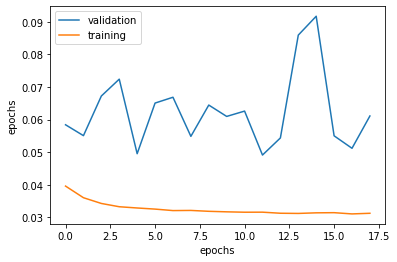

In [ ]:
if load_dataset_from_excel:
  [modelo,history] = make_prediction(dataFrame,best_results_of_simulation00[len(best_results_of_simulation01)-1]['parameters'])
else:
  [modelo,history] = make_prediction(dataFrame,best_results_of_simulation00[len(best_results_of_simulation00)-1][1]['parameters'])

plt.plot(history.history['val_mse'][1:len(history.history['val_mse'])-1], label = "validation")
plt.plot(history.history['mse'][1:len(history.history['val_mse'])-1], label = "training")
plt.xlabel('epochs')
plt.ylabel('epochs')
plt.legend()
plt.show()

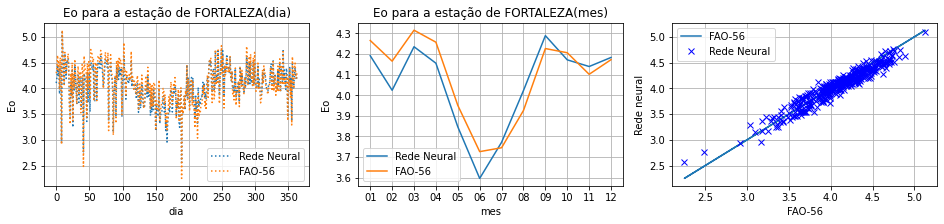

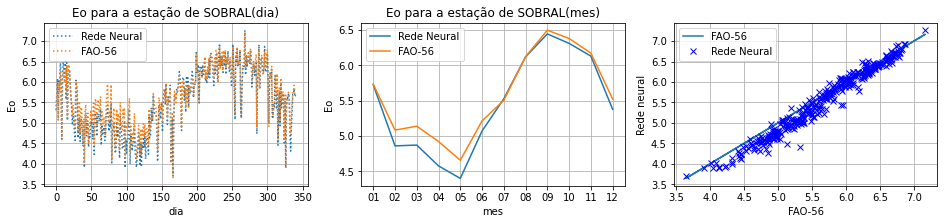

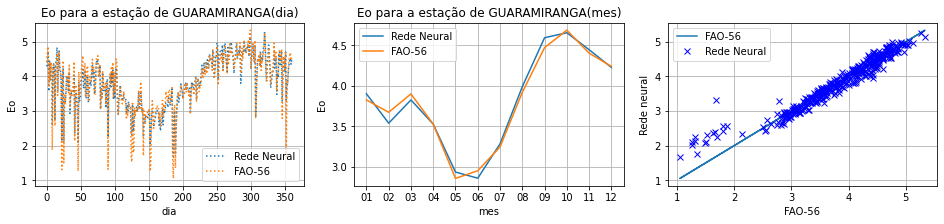

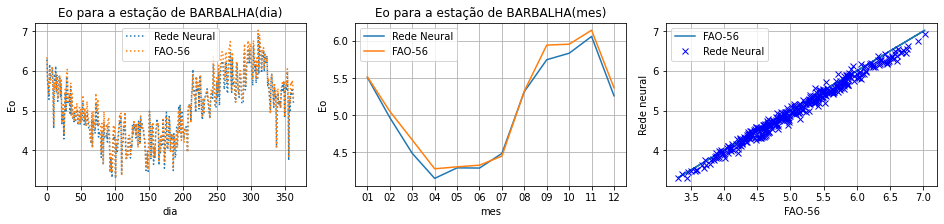

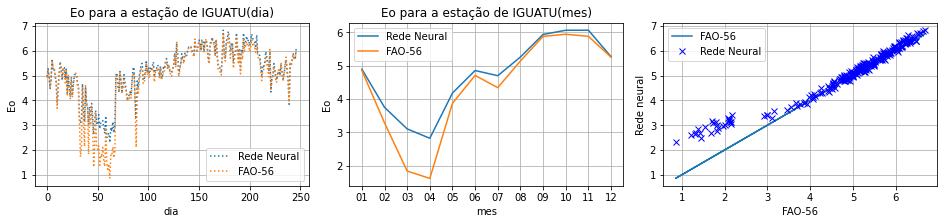

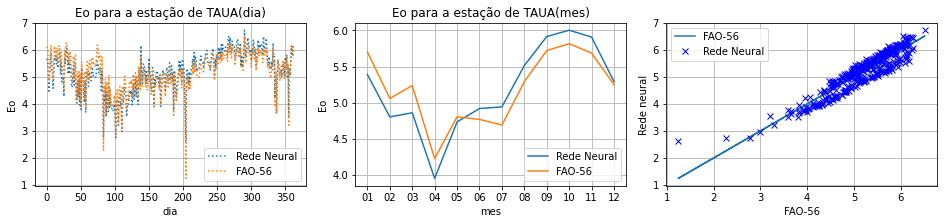

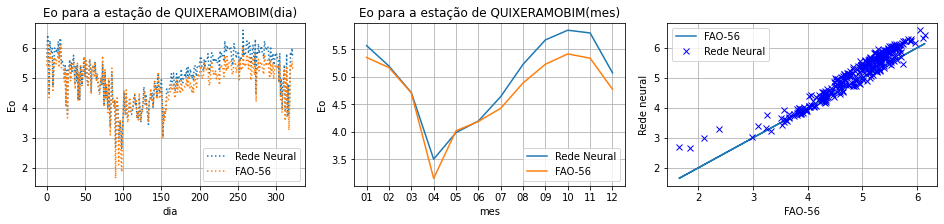

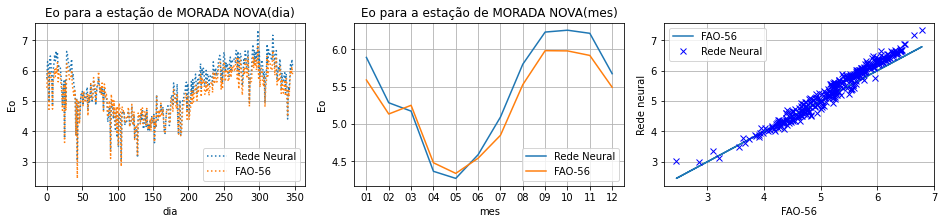

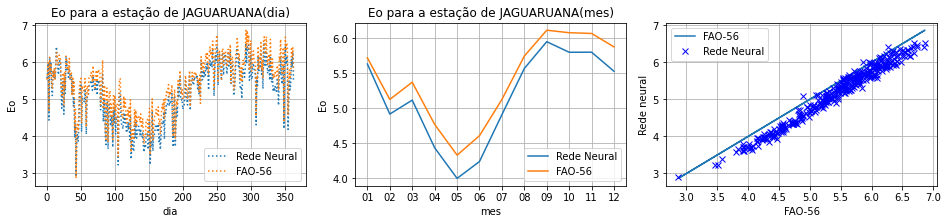

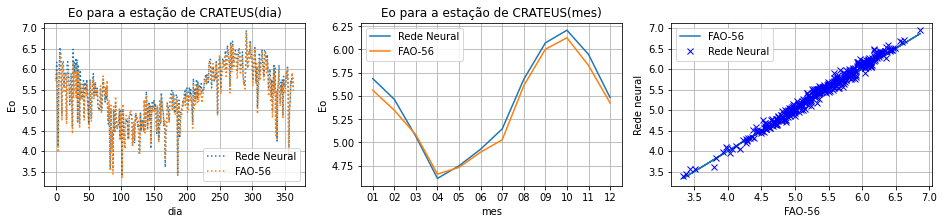

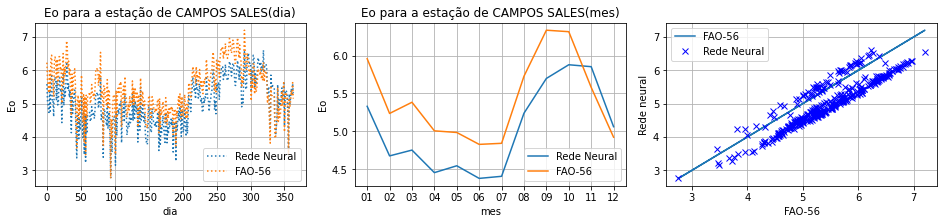

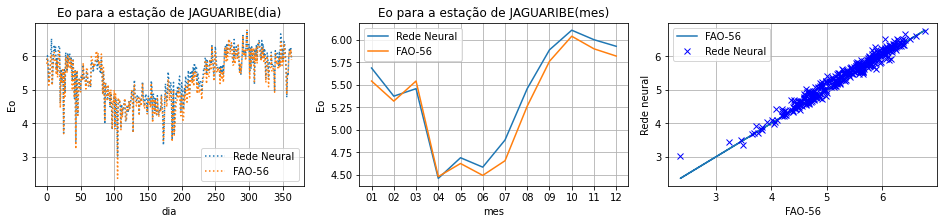

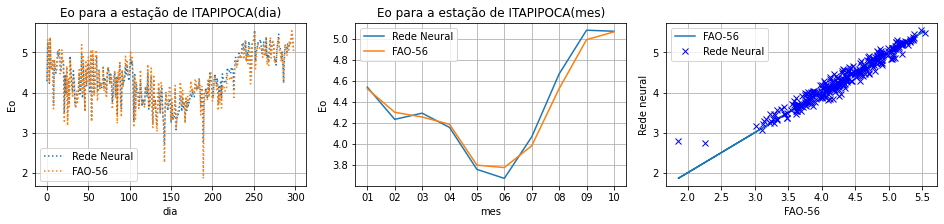

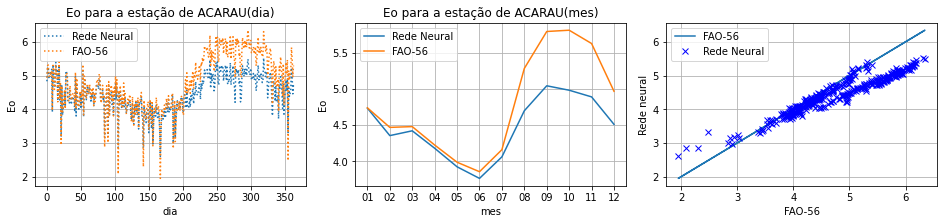

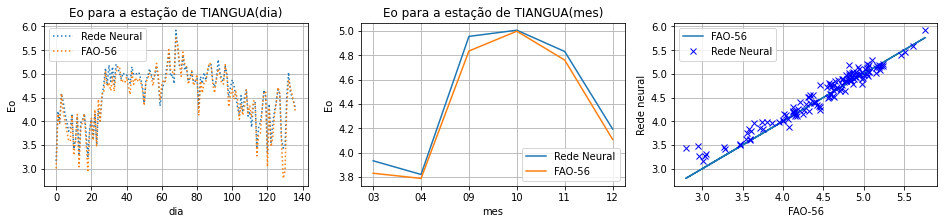

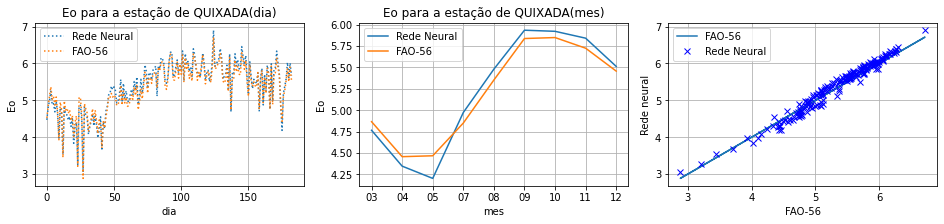

In [ ]:
test_labels = pd.DataFrame(modelo.test_labels)
prediction_test = pd.DataFrame(modelo.prediction_test)

test_labels['data'] = modelo.test_labels.index
prediction_test['data'] = modelo.test_labels.index

test_labels['mes'] = [mes for mes in modelo.mes]
prediction_test['mes'] = [mes for mes in modelo.mes]
test_labels['ano'] = [mes for mes in modelo.ano]
prediction_test['ano'] = [mes for mes in modelo.ano]

test_labels_gruopby_data = test_labels.groupby(['data']).mean()
prediction_test_gruopby_data = prediction_test.groupby(['data']).mean()

test_labels_gruopby_month = test_labels.groupby(['mes']).mean()
prediction_test_gruopby_month = prediction_test.groupby(['mes']).mean()

test_labels['estacao_id'] = [id for id in modelo.estacao_id ]
prediction_test['estacao_id'] = [id for id in modelo.estacao_id ]

#display(prediction_test)

results_by_estation = get_graphs_and_metrics_grouped_by_estacao_id(prediction_test,test_labels,'mes','2018',localization,id_2,show_picture = True)

In [ ]:
display(results_by_estation.T)

,código da estação,Quantidade de dados,coeficiente de determinação(dia),MSE(dia),coeficiente de determinação(mes),MSE(mes)
FORTALEZA,A305,364,0.913743,0.013598,0.822768,0.007231
SOBRAL,A306,341,0.924225,0.0374,0.93409,0.029792
GUARAMIRANGA,A314,361,0.927737,0.04604,0.983207,0.005698
BARBALHA,A315,364,0.972778,0.01681,0.973933,0.010997
IGUATU,A319,247,0.900826,0.16493,0.728606,0.298337
TAUA,A324,363,0.844266,0.075715,0.83858,0.05399
QUIXERAMOBIM,A325,323,0.78922,0.103629,0.840066,0.084581
MORADA NOVA,A332,348,0.892142,0.05684,0.906709,0.044644
JAGUARUANA,A339,364,0.854096,0.080408,0.823419,0.070788
CRATEUS,A342,364,0.969264,0.012212,0.973232,0.006722


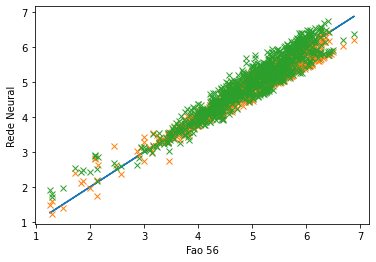

0.9450647162610492


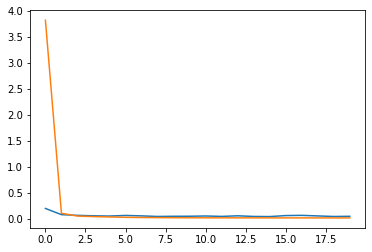

In [ ]:
modelo.compare(1000,True)
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.show()

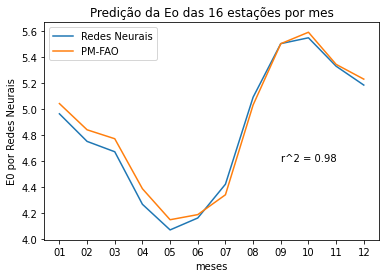

0.9799234349645077

In [ ]:
plt.plot(prediction_test_gruopby_month, label = 'Redes Neurais')
plt.plot(test_labels_gruopby_month, label = 'PM-FAO')
plt.legend()
plt.text(8,4.6,'r^2 = '+str(round(r2_score(prediction_test_gruopby_month,test_labels_gruopby_month),3)))
plt.xlabel('meses')
plt.ylabel('E0 por Redes Neurais')
plt.title('Predição da Eo das 16 estações por mes')
plt.show()

display(r2_score(prediction_test_gruopby_month,test_labels_gruopby_month))

## **All results of the simulation 01**

This subsection is included the graphs and metrics such as  $r^2$ and MSE per monthly mean and day. The graphs that present the monthly mean results are related to 2018, the year which contains most data from the test data set.

0.9476773411170402


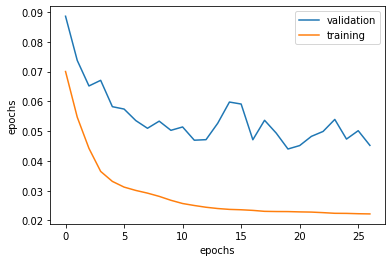

In [ ]:
if load_dataset_from_excel:
  [modelo,history] = make_prediction(dataFrame,best_results_of_simulation01[len(best_results_of_simulation01)-1]['parameters'])
else:
  [modelo,history] = make_prediction(dataFrame,best_results_of_simulation01[len(best_results_of_simulation00)-1][1]['parameters'])

plt.plot(history.history['val_mse'][3:40], label = "validation")
plt.plot(history.history['mse'][3:40], label = "training")
plt.xlabel('epochs')
plt.ylabel('epochs')
plt.legend()
plt.show()

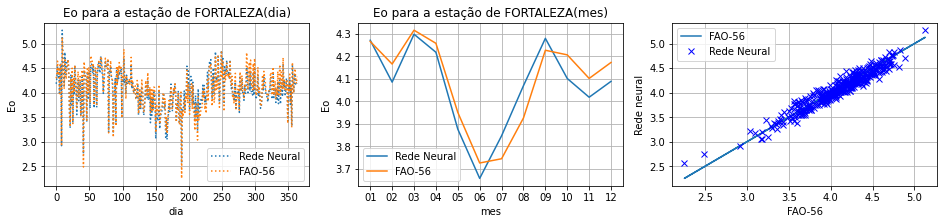

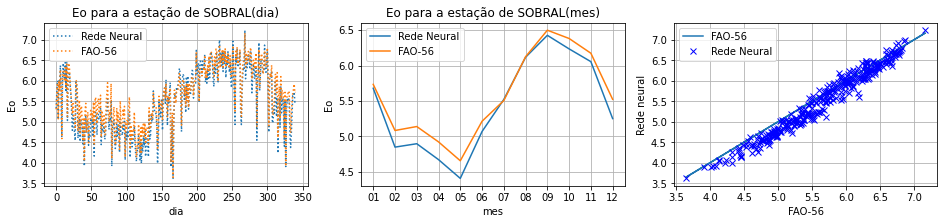

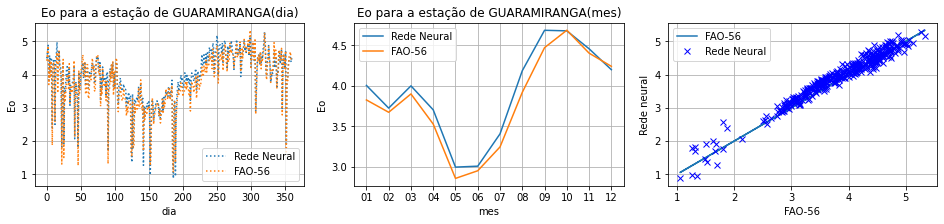

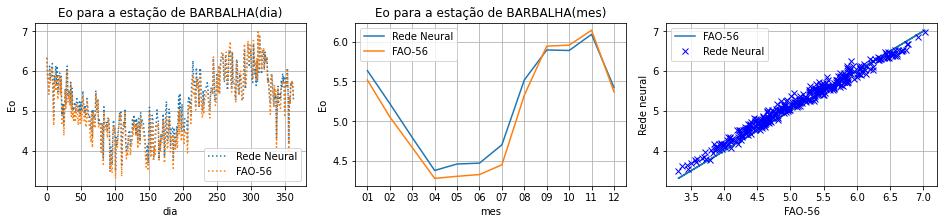

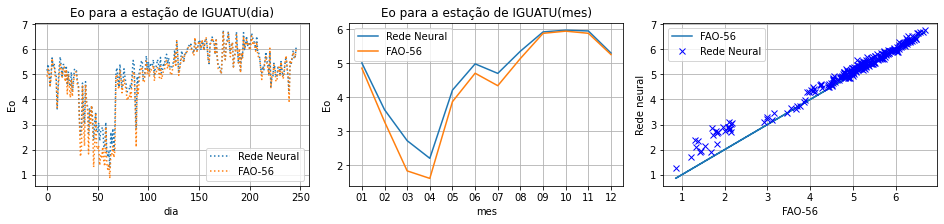

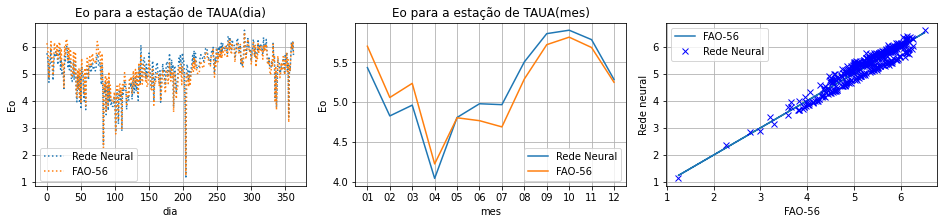

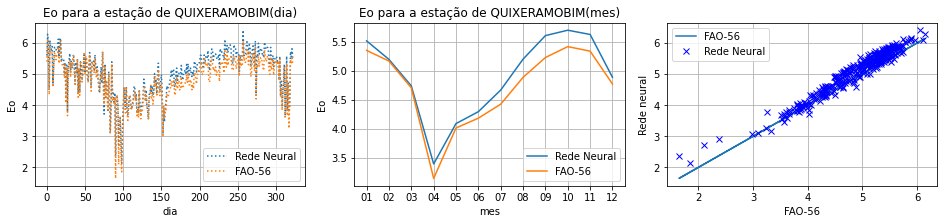

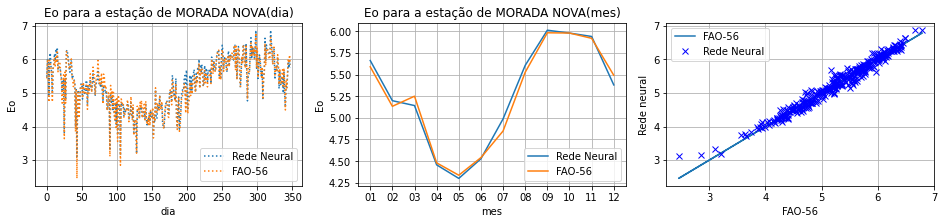

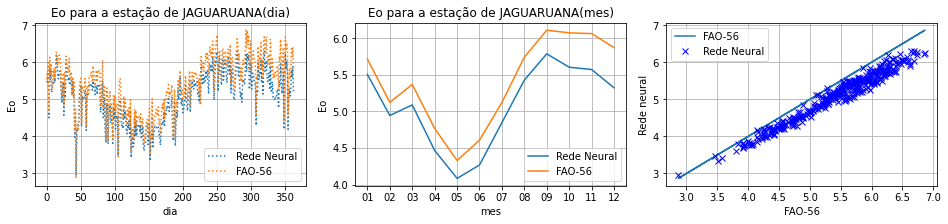

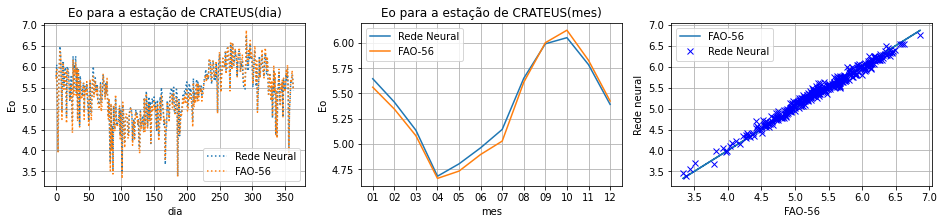

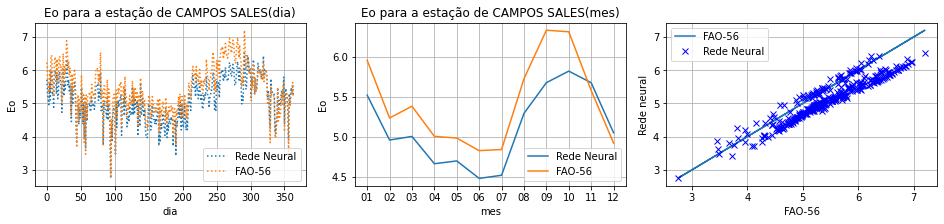

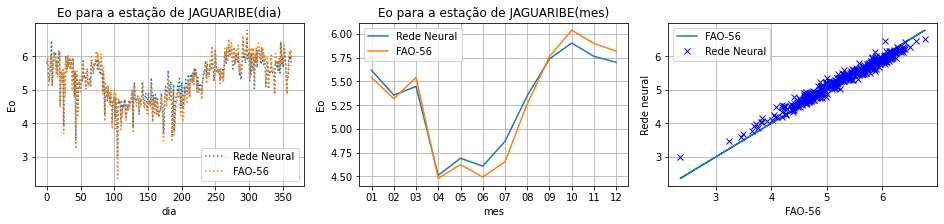

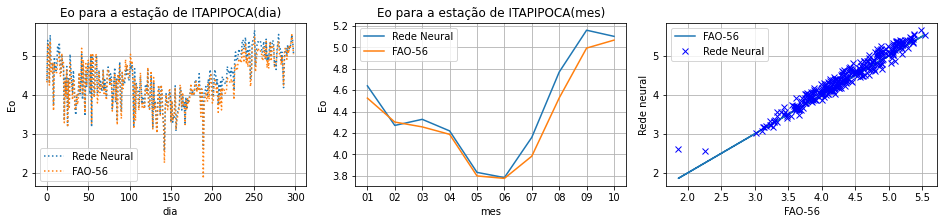

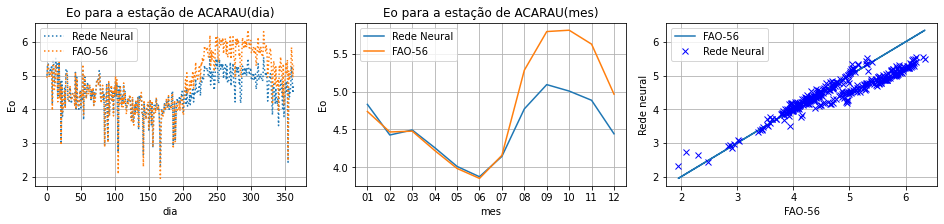

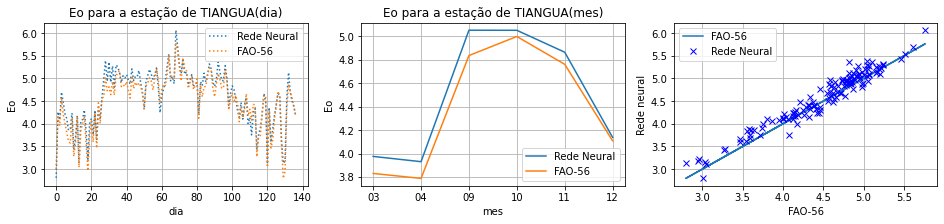

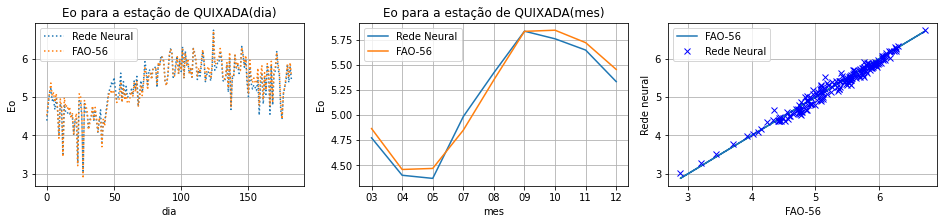

In [ ]:
test_labels = pd.DataFrame(modelo.test_labels)
prediction_test = pd.DataFrame(modelo.prediction_test)

test_labels['data'] = modelo.test_labels.index
prediction_test['data'] = modelo.test_labels.index

test_labels['mes'] = [mes for mes in modelo.mes]
prediction_test['mes'] = [mes for mes in modelo.mes]
test_labels['ano'] = [mes for mes in modelo.ano]
prediction_test['ano'] = [mes for mes in modelo.ano]

test_labels_gruopby_data = test_labels.groupby(['data']).mean()
prediction_test_gruopby_data = prediction_test.groupby(['data']).mean()

test_labels_gruopby_month = test_labels.groupby(['mes']).mean()
prediction_test_gruopby_month = prediction_test.groupby(['mes']).mean()

test_labels['estacao_id'] = [id for id in modelo.estacao_id ]
prediction_test['estacao_id'] = [id for id in modelo.estacao_id ]

#display(prediction_test)

results_by_estation = get_graphs_and_metrics_grouped_by_estacao_id(prediction_test,test_labels,'mes','2018',localization,id_2,show_picture = True)

In [ ]:
display(results_by_estation.T)

,código da estação,Quantidade de dados,coeficiente de determinação(dia),MSE(dia),coeficiente de determinação(mes),MSE(mes)
FORTALEZA,A305,364,0.925265,0.011782,0.815511,0.006446
SOBRAL,A306,341,0.911946,0.04346,0.924144,0.031433
GUARAMIRANGA,A314,361,0.939464,0.038568,0.932501,0.020634
BARBALHA,A315,364,0.957815,0.026051,0.947026,0.018853
IGUATU,A319,247,0.948941,0.084913,0.902984,0.138292
TAUA,A324,363,0.897957,0.049611,0.863154,0.036818
QUIXERAMOBIM,A325,323,0.870637,0.063601,0.895192,0.048659
MORADA NOVA,A332,348,0.969909,0.015857,0.984419,0.005244
JAGUARUANA,A339,364,0.756544,0.13417,0.579735,0.122202
CRATEUS,A342,364,0.978648,0.008484,0.97858,0.004009


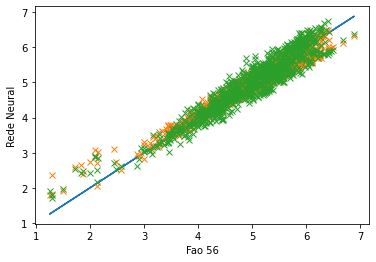

0.9476773411170402


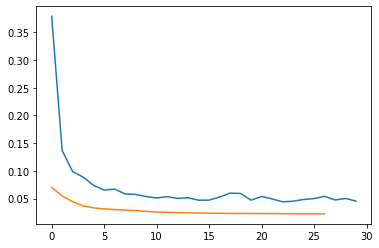

In [ ]:
modelo.compare(1000,True)
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'][3:30])
plt.show()

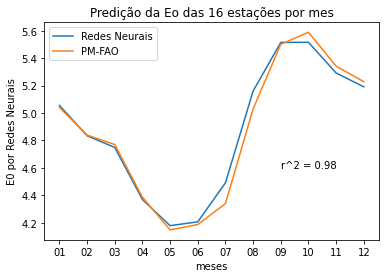

0.9797940199720766

In [ ]:
plt.plot(prediction_test_gruopby_month, label = 'Redes Neurais')
plt.plot(test_labels_gruopby_month, label = 'PM-FAO')
plt.legend()
plt.text(8,4.6,'r^2 = '+str(round(r2_score(prediction_test_gruopby_month,test_labels_gruopby_month),3)))
plt.xlabel('meses')
plt.ylabel('E0 por Redes Neurais')
plt.title('Predição da Eo das 16 estações por mes')
plt.show()

display(r2_score(prediction_test_gruopby_month,test_labels_gruopby_month))

## Performing the hypothesis test

Based on the set of the hyperparameters that produced the highest $r^2$ in simulation 1 and simulation 2, 2 same-size data sets are created using them. In order to ensure that one set of the hyperparameters is better than the other one in terms of mean, the hypothesis test is carried out following the below statements.

$h_{0} :$ Both means are statistically similar.

$h_{1} :$ The means of the distributions underlying the samples are unequal

If the p-value is less or equals 0.05, the null hypothesis($h_{0}$) is rejected and the alternative hypothesis($h_{1}$) is accepted. Otherwise, if the p-value is larger than 0.05, the $h_0$ is accepted. In relation to this project, accepting the $h_0$ means that both sets of hyperparameters produce the same results statistically speaking. Thus, it is more advantageous to work with the first one as it uses fewer features.  

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

In [ ]:
modelo0_sample = [make_prediction(dataFrame,parameter00)[0].compare(100) for x in range(30)]
modelo1_sample = [make_prediction(dataFrame,parameter01)[0].compare(100) for x in range(30)]

In [ ]:
display(pd.Series(modelo0_sample).mean(),pd.Series(modelo0_sample).std())
display(pd.Series(modelo1_sample).mean(),pd.Series(modelo1_sample).std())

0.9386079724693663

0.011651284412383365

0.936131714223248

0.010653342922841761

In [ ]:
ttest_ind(modelo1_sample,modelo0_sample,alternative='two-sided',equal_var=False)

Ttest_indResult(statistic=-0.8511417562053726, pvalue=0.3983064701436485)

#checking the correlation between the features and target variable.

To measure the correlation, the Pearson correlation coefficient is obtained for each available feature in the model in relation to the target variable, providing the direction and strength of that relationship. This metric varies from -1 to 1, for larger values than 0, the correlation is positive. for smaller values than 0, the correlation is negative then it gives opposite directions which means the increase in the feature causes the decrease in the target. the closer that metric is to the 1 and -1 values, the stronger is that correlation.

In [ ]:
correlation_of_features = r_regression(dataFrame.drop(columns={'latitude','longitude','altura','estacao_id','dia do ano','data completa','Eo_FAO','mes','ano'}),dataFrame['Eo_FAO'])
features_name = dataFrame.drop(columns={'latitude','longitude','altura','estacao_id','dia do ano','data completa','Eo_FAO','mes','ano'}).keys()
correlations_table = dict()

for index in range(len(features_name)):
  correlations_table[index] = features_name[index]
  
pd.DataFrame(correlation_of_features).T.rename(columns=correlations_table)

,TEMPERATURA MAXIMA NA HORA ANT. (AUT)(°C),UMIDADE REL. MAX. NA HORA ANT. (AUT)(%),TEMPERATURA MINIMA NA HORA ANT. (AUT)(°C),UMIDADE REL. MIN. NA HORA ANT. (AUT)(%),RADIACAO GLOBAL(Kj/m²),"PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA(mB)","UMIDADE RELATIVA DO AR, HORARIA(%)","VENTO, VELOCIDADE HORARIA(m/s)",temperatura media,Eo_samani
0,0.81284,-0.291154,0.030777,-0.715946,0.079393,0.148632,-0.575127,-0.085032,0.576381,0.967537
